<a href="https://colab.research.google.com/github/bertinderr/Skripsi-Delfi/blob/main/bismillah_ini_otak_atik_sebelum_fix_(reduce_dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.flush_and_unmount()


Drive not mounted, so nothing to flush and unmount.


In [ ]:
from google.colab import drive

# Provide a different directory path that is empty
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!sudo apt-get update
!sudo apt-get install -y libsndfile1 -y
!pip install --upgrade pip
!sudo apt-get install portaudio19-dev -y
!pip install librosa keras tensorflow SpeechRecognition pyaudio ipywebrtc soundfile
!pip install --upgrade librosa

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [47.2 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:7 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,248 kB]
Get:8 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [1,467 kB]
Get:9 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,015 kB]
Get:10 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease [18.1 kB]
Hit:11 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:13 https://ppa.launchpadcont

In [ ]:
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from pathlib import Path
import csv

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from tqdm import tqdm_notebook
import speech_recognition as sr

import soundfile as sf
import shutil

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

### convert dari SPH ke WAV

In [ ]:
AudioSPH = "/content/drive/MyDrive/kuliah suckssss./smt 7 skripshotttt/BERSAMA SAMA/AudioSPH/"
AudioWAV = "/content/drive/MyDrive/kuliah suckssss./smt 7 skripshotttt/BERSAMA SAMA/AudioWAV/"

# Create the destination folder if it doesn't exist
if not os.path.exists(AudioWAV):
    os.makedirs(AudioWAV)

# Recursively search for .sph files in nested folders
for root, _, files in os.walk(AudioSPH):
    for filename in files:
        if filename.endswith('.sph'):
            input_path = os.path.join(root, filename)

            # Get the relative path within the source folder
            rel_path = os.path.relpath(root, AudioSPH)

            # Create a folder name for the destination folder
            dest_folder_name = rel_path.replace(os.path.sep, '-')

            output_filename = f'{dest_folder_name}-{os.path.splitext(filename)[0]}.wav'
            output_path = os.path.join(AudioWAV, output_filename)

            # Convert SPH to WAV using soundfile
            sph_data, sample_rate = sf.read(input_path)
            sf.write(output_path, sph_data, sample_rate)

print("Conversion completed.")

## data prep

In [ ]:
# Paths for data.
dataSet = "/content/drive/MyDrive/kuliah suckssss./smt 7 skripshotttt/BERSAMA SAMA/AudioSPH/"
#AudioWAV = "/content/drive/MyDrive/kuliah suckssss./smt 7 skripshotttt/BERSAMA SAMA/AudioWAV/"
AudioWAVhigh2 = "/content/drive/MyDrive/kuliah suckssss./smt 7 skripshotttt/BERSAMA SAMA/AudioWAVhigh2/"
AudioWAVlow2 = "/content/drive/MyDrive/kuliah suckssss./smt 7 skripshotttt/BERSAMA SAMA/AudioWAVlow2/"
LowDF= "/content/drive/MyDrive/kuliah suckssss./smt 7 skripshotttt/BERSAMA SAMA/data_pathlow2.csv"
HighDF= "/content/drive/MyDrive/kuliah suckssss./smt 7 skripshotttt/BERSAMA SAMA/data_pathhigh2.csv"


### high data prep

In [ ]:
audio_directory_list = os.listdir(AudioWAVhigh2)

file_emotion = []
file_path = []
for file in audio_directory_list:
    part = file.split('.')[0]
    # part = part.split('-')
    # third part in each file represents the emotion associated to that file.
    file_emotion.append("HighStress")
    file_path.append(AudioWAVhigh2 + file)

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])


# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Audio_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Audio_df.Emotions.replace({'HighStress'}, inplace=True)
Audio_df.head()


data_path = Audio_df
data_path.to_csv("data_pathhigh2.csv",index=False)
shutil.move("data_pathhigh2.csv", HighDF)

df = pd.read_csv(HighDF)
data_path.head()

,Emotions,Path
0,HighStress,/content/drive/MyDrive/kuliah suckssss./smt 7 ...
1,HighStress,/content/drive/MyDrive/kuliah suckssss./smt 7 ...
2,HighStress,/content/drive/MyDrive/kuliah suckssss./smt 7 ...
3,HighStress,/content/drive/MyDrive/kuliah suckssss./smt 7 ...
4,HighStress,/content/drive/MyDrive/kuliah suckssss./smt 7 ...


In [ ]:
data_pathhigh2 = Audio_df
data_pathhigh2.to_csv("data_pathhigh2.csv",index=False)

import shutil
shutil.move("data_pathhigh2.csv", "/content/drive/My Drive/kuliah suckssss./smt 7 skripshotttt/BERSAMA SAMA/data_pathhigh2.csv")
data_pathhigh2.head()

,Emotions,Path
0,HighStress,/content/drive/MyDrive/kuliah suckssss./smt 7 ...
1,HighStress,/content/drive/MyDrive/kuliah suckssss./smt 7 ...
2,HighStress,/content/drive/MyDrive/kuliah suckssss./smt 7 ...
3,HighStress,/content/drive/MyDrive/kuliah suckssss./smt 7 ...
4,HighStress,/content/drive/MyDrive/kuliah suckssss./smt 7 ...


### low data prep

In [ ]:
audio_directory_list = os.listdir(AudioWAVlow2)

file_emotion = []
file_path = []
for file in audio_directory_list:
    part = file.split('.')[0]
    # part = part.split('-')
    # third part in each file represents the emotion associated to that file.
    file_emotion.append("LowStress")
    file_path.append(AudioWAVlow2 + file)

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])


# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Audio_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Audio_df.Emotions.replace({'LowStress'}, inplace=True)
Audio_df.head()


data_path = Audio_df
data_path.to_csv("data_pathlow2.csv",index=False)
shutil.move("data_pathlow2.csv", LowDF)

df = pd.read_csv(LowDF)
data_path.head()

,Emotions,Path
0,LowStress,/content/drive/MyDrive/kuliah suckssss./smt 7 ...
1,LowStress,/content/drive/MyDrive/kuliah suckssss./smt 7 ...
2,LowStress,/content/drive/MyDrive/kuliah suckssss./smt 7 ...
3,LowStress,/content/drive/MyDrive/kuliah suckssss./smt 7 ...
4,LowStress,/content/drive/MyDrive/kuliah suckssss./smt 7 ...


In [ ]:
data_pathlow2 = Audio_df
data_pathlow2.to_csv("data_pathlow2.csv",index=False)

import shutil
shutil.move("data_pathlow2.csv", "/content/drive/My Drive/kuliah suckssss./smt 7 skripshotttt/BERSAMA SAMA/data_pathlow2.csv")
data_pathlow2.head()

,Emotions,Path
0,LowStress,/content/drive/MyDrive/kuliah suckssss./smt 7 ...
1,LowStress,/content/drive/MyDrive/kuliah suckssss./smt 7 ...
2,LowStress,/content/drive/MyDrive/kuliah suckssss./smt 7 ...
3,LowStress,/content/drive/MyDrive/kuliah suckssss./smt 7 ...
4,LowStress,/content/drive/MyDrive/kuliah suckssss./smt 7 ...


## data visualization

In [ ]:
#data_path high
# Membaca file CSV dari Google Drive
dfhigh = pd.read_csv('/content/drive/My Drive/kuliah suckssss./smt 7 skripshotttt/BERSAMA SAMA/data_pathhigh2.csv')

# Menampilkan lima baris pertama dari dataframe
print(dfhigh.head())

     Emotions                                               Path
0  HighStress  /content/drive/MyDrive/kuliah suckssss./smt 7 ...
1  HighStress  /content/drive/MyDrive/kuliah suckssss./smt 7 ...
2  HighStress  /content/drive/MyDrive/kuliah suckssss./smt 7 ...
3  HighStress  /content/drive/MyDrive/kuliah suckssss./smt 7 ...
4  HighStress  /content/drive/MyDrive/kuliah suckssss./smt 7 ...


In [ ]:
#data_path low
# Membaca file CSV dari Google Drive
dflow = pd.read_csv('/content/drive/My Drive/kuliah suckssss./smt 7 skripshotttt/BERSAMA SAMA/data_pathlow2.csv')

# Menampilkan lima baris pertama dari dataframe
print(dflow.head())

    Emotions                                               Path
0  LowStress  /content/drive/MyDrive/kuliah suckssss./smt 7 ...
1  LowStress  /content/drive/MyDrive/kuliah suckssss./smt 7 ...
2  LowStress  /content/drive/MyDrive/kuliah suckssss./smt 7 ...
3  LowStress  /content/drive/MyDrive/kuliah suckssss./smt 7 ...
4  LowStress  /content/drive/MyDrive/kuliah suckssss./smt 7 ...


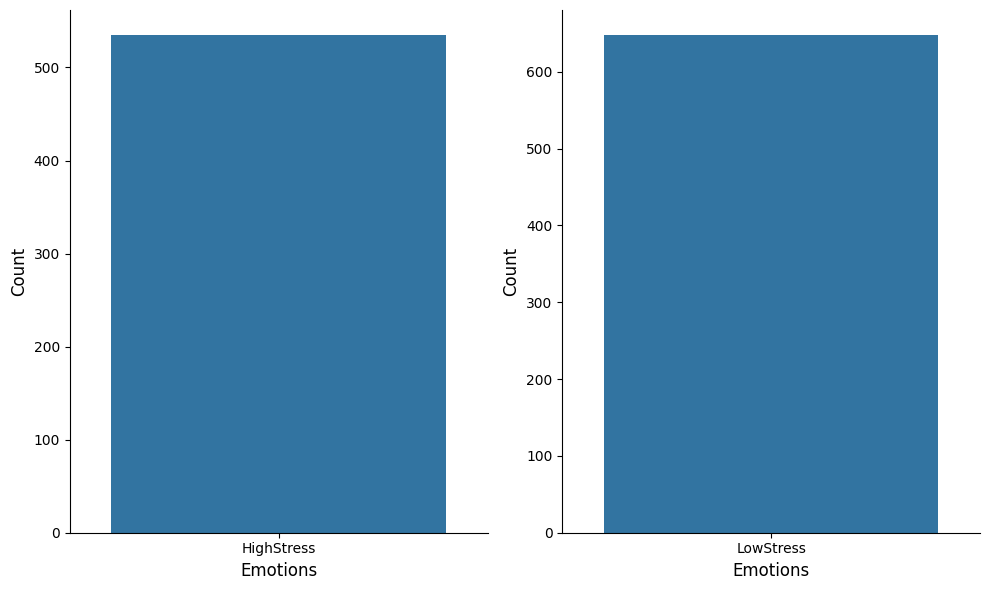

In [ ]:
#ini gausah
#plt.figure(1)
#plt.title('Count of Emotions', size=16)

#sns.countplot(data=dfhigh, x='Emotions')
#sns.countplot(data=dflow, x='Emotions')
#plt.ylabel('Count', size=12)
#plt.xlabel('Emotions', size=12)
#sns.despine(top=True, right=True, left=False, bottom=False)
#plt.show()

dflow_path = '/content/drive/My Drive/kuliah suckssss./smt 7 skripshotttt/BERSAMA SAMA/data_pathlow2.csv'
dfhigh_path = '/content/drive/My Drive/kuliah suckssss./smt 7 skripshotttt/BERSAMA SAMA/data_pathhigh2.csv'

# Load data from CSV files
dflow = pd.read_csv(dflow_path)
dfhigh = pd.read_csv(dfhigh_path)

# Plotting
plt.figure(1, figsize=(10, 6))  # Adjust the figsize as needed
plt.title('Count of Emotions', size=16)

plt.subplot(1, 2, 1)  # Subplot for dfhigh
sns.countplot(data=dfhigh, x='Emotions')
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)

plt.subplot(1, 2, 2)  # Subplot for dflow
sns.countplot(data=dflow, x='Emotions')
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)

sns.despine(top=True, right=True, left=False, bottom=False)
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

## add noise

### ke folder high

In [ ]:
import numpy as np

def band_limited_noise(min_freq, max_freq, samples, samplerate):
    noise = np.random.normal(0, 1, samples)
    fft = np.fft.fft(noise)
    fft[:min_freq] = 0
    fft[max_freq:] = 0
    return np.fft.ifft(fft).real

def add_noise_to_folder(input_folder_path, output_folder_path, min_freq, max_freq, noise_filename="noise_clip.wav"):
    # Memastikan folder output ada, jika tidak, buat folder baru
    os.makedirs(output_folder_path, exist_ok=True)

    # Hitung panjang file audio terpanjang di dalam folder
    max_audio_len = 0
    for filename in os.listdir(input_folder_path):
        if filename.endswith(".wav"):
            input_path = os.path.join(input_folder_path, filename)
            audio_clip, sr = sf.read(input_path)
            max_audio_len = max(max_audio_len, len(audio_clip))

    # Buat noise_clip dengan panjang yang sama dengan file audio terpanjang
    noise_clip = band_limited_noise(min_freq, max_freq, max_audio_len, sr)

    # Simpan noise_clip sebagai file audio terpisah
    noise_clip_path = os.path.join('/content/drive/MyDrive/kuliah suckssss./smt 7 skripshotttt/BERSAMA SAMA', noise_filename)
    sf.write(noise_clip_path, noise_clip, sr)

    # Loop melalui setiap file dalam folder input
    for filename in os.listdir(input_folder_path):
        if filename.endswith(".wav"):
            input_path = os.path.join(input_folder_path, filename)
            output_path = os.path.join(output_folder_path, filename)

            # Memuat audio clip
            audio_clip, sr = sf.read(input_path)

            # Menyesuaikan panjang noise_clip jika perlu
            if len(noise_clip) < len(audio_clip):
                noise_clip = np.pad(noise_clip, (0, len(audio_clip) - len(noise_clip)))
            else:
                noise_clip = noise_clip[:len(audio_clip)]

            # Menambahkan noise ke audio
            audio_with_noise = audio_clip + 0.1 * noise_clip  # Sesuaikan dengan tingkat kebisingan yang diinginkan

            # Menyimpan audio dengan noise ke file output
            sf.write(output_path, audio_with_noise, sr)


In [ ]:
input_folder_path = '/content/drive/MyDrive/kuliah suckssss./smt 7 skripshotttt/BERSAMA SAMA/AudioWAVhigh2/'
output_folder_path = '/content/drive/MyDrive/kuliah suckssss./smt 7 skripshotttt/BERSAMA SAMA/AudioWAVhigh2noise/'
#noise_len = 2  # seconds
min_freq = 4000
max_freq = 12000
add_noise_to_folder(input_folder_path, output_folder_path, min_freq, max_freq)

### ke folder low

In [ ]:
import numpy as np

def band_limited_noise(min_freq, max_freq, samples, samplerate):
    noise = np.random.normal(0, 1, samples)
    fft = np.fft.fft(noise)
    fft[:min_freq] = 0
    fft[max_freq:] = 0
    return np.fft.ifft(fft).real

def add_noise_to_folder(input_folder_path, output_folder_path, min_freq, max_freq, noise_filename="noise_clip.wav"):
    # Memastikan folder output ada, jika tidak, buat folder baru
    os.makedirs(output_folder_path, exist_ok=True)

    # Hitung panjang file audio terpanjang di dalam folder
    max_audio_len = 0
    for filename in os.listdir(input_folder_path):
        if filename.endswith(".wav"):
            input_path = os.path.join(input_folder_path, filename)
            audio_clip, sr = sf.read(input_path)
            max_audio_len = max(max_audio_len, len(audio_clip))

    # Buat noise_clip dengan panjang yang sama dengan file audio terpanjang
    noise_clip = band_limited_noise(min_freq, max_freq, max_audio_len, sr)

    # Simpan noise_clip sebagai file audio terpisah
    noise_clip_path = os.path.join('/content/drive/MyDrive/kuliah suckssss./smt 7 skripshotttt/BERSAMA SAMA', noise_filename)
    sf.write(noise_clip_path, noise_clip, sr)

    # Loop melalui setiap file dalam folder input
    for filename in os.listdir(input_folder_path):
        if filename.endswith(".wav"):
            input_path = os.path.join(input_folder_path, filename)
            output_path = os.path.join(output_folder_path, filename)

            # Memuat audio clip
            audio_clip, sr = sf.read(input_path)

            # Menyesuaikan panjang noise_clip jika perlu
            if len(noise_clip) < len(audio_clip):
                noise_clip = np.pad(noise_clip, (0, len(audio_clip) - len(noise_clip)))
            else:
                noise_clip = noise_clip[:len(audio_clip)]

            # Menambahkan noise ke audio
            audio_with_noise = audio_clip + 0.1 * noise_clip  # Sesuaikan dengan tingkat kebisingan yang diinginkan

            # Menyimpan audio dengan noise ke file output
            sf.write(output_path, audio_with_noise, sr)


In [ ]:
input_folder_path = '/content/drive/MyDrive/kuliah suckssss./smt 7 skripshotttt/BERSAMA SAMA/AudioWAVlow2/'
output_folder_path = '/content/drive/MyDrive/kuliah suckssss./smt 7 skripshotttt/BERSAMA SAMA/AudioWAVlow2noise/'
#noise_len = 2  # seconds
min_freq = 4000
max_freq = 12000
add_noise_to_folder(input_folder_path, output_folder_path, min_freq, max_freq)

## noise reduction using spectral gating

### high

In [ ]:
import os
import librosa
import numpy as np

In [ ]:
pip install --upgrade librosa

In [ ]:
import time
from datetime import timedelta as td


def _stft(y, n_fft, hop_length, win_length):
    return librosa.stft(y=y, n_fft=n_fft, hop_length=hop_length, win_length=win_length)


def _istft(y, hop_length, win_length):
    return librosa.istft(y, hop_length, win_length)


def _amp_to_db(x):
    return librosa.core.amplitude_to_db(x, ref=1.0, amin=1e-20, top_db=80.0)


def _db_to_amp(x,):
    return librosa.core.db_to_amplitude(x, ref=1.0)


def plot_spectrogram(signal, title):
    fig, ax = plt.subplots(figsize=(20, 4))
    cax = ax.matshow(
        signal,
        origin="lower",
        aspect="auto",
        cmap=plt.cm.seismic,
        vmin=-1 * np.max(np.abs(signal)),
        vmax=np.max(np.abs(signal)),
    )
    fig.colorbar(cax)
    ax.set_title(title)
    plt.tight_layout()
    plt.show()


def plot_statistics_and_filter(
    mean_freq_noise, std_freq_noise, noise_thresh, smoothing_filter
):
    fig, ax = plt.subplots(ncols=2, figsize=(20, 4))
    plt_mean, = ax[0].plot(mean_freq_noise, label="Mean power of noise")
    plt_std, = ax[0].plot(std_freq_noise, label="Std. power of noise")
    plt_std, = ax[0].plot(noise_thresh, label="Noise threshold (by frequency)")
    ax[0].set_title("Threshold for mask")
    ax[0].legend()
    cax = ax[1].matshow(smoothing_filter, origin="lower")
    fig.colorbar(cax)
    ax[1].set_title("Filter for smoothing Mask")
    plt.show()


def removeNoise(
    audio_clip,
    noise_clip,
    n_grad_freq=2,
    n_grad_time=4,
    n_fft=2048,
    win_length=2048,
    hop_length=512,
    n_std_thresh=1.5,
    prop_decrease=1.0,
    verbose=False,
    visual=False,
):
    """Remove noise from audio based upon a clip containing only noise

    Args:
        audio_clip (array): The first parameter.
        noise_clip (array): The second parameter.
        n_grad_freq (int): how many frequency channels to smooth over with the mask.
        n_grad_time (int): how many time channels to smooth over with the mask.
        n_fft (int): number audio of frames between STFT columns.
        win_length (int): Each frame of audio is windowed by `window()`. The window will be of length `win_length` and then padded with zeros to match `n_fft`..
        hop_length (int):number audio of frames between STFT columns.
        n_std_thresh (int): how many standard deviations louder than the mean dB of the noise (at each frequency level) to be considered signal
        prop_decrease (float): To what extent should you decrease noise (1 = all, 0 = none)
        visual (bool): Whether to plot the steps of the algorithm

    Returns:
        array: The recovered signal with noise subtracted

    """
    if verbose:
        start = time.time()
    # STFT over noise
    noise_stft = _stft(noise_clip, n_fft, hop_length, win_length)
    noise_stft_db = _amp_to_db(np.abs(noise_stft))  # convert to dB
    # Calculate statistics over noise
    mean_freq_noise = np.mean(noise_stft_db, axis=1)
    std_freq_noise = np.std(noise_stft_db, axis=1)
    noise_thresh = mean_freq_noise + std_freq_noise * n_std_thresh
    if verbose:
        print("STFT on noise:", td(seconds=time.time() - start))
        start = time.time()
    # STFT over signal
    if verbose:
        start = time.time()
    sig_stft = _stft(audio_clip, n_fft, hop_length, win_length)
    sig_stft_db = _amp_to_db(np.abs(sig_stft))
    if verbose:
        print("STFT on signal:", td(seconds=time.time() - start))
        start = time.time()
    # Calculate value to mask dB to
    mask_gain_dB = np.min(_amp_to_db(np.abs(sig_stft)))
    print(noise_thresh, mask_gain_dB)
    # Create a smoothing filter for the mask in time and frequency
    smoothing_filter = np.outer(
        np.concatenate(
            [
                np.linspace(0, 1, n_grad_freq + 1, endpoint=False),
                np.linspace(1, 0, n_grad_freq + 2),
            ]
        )[1:-1],
        np.concatenate(
            [
                np.linspace(0, 1, n_grad_time + 1, endpoint=False),
                np.linspace(1, 0, n_grad_time + 2),
            ]
        )[1:-1],
    )
    smoothing_filter = smoothing_filter / np.sum(smoothing_filter)
    # calculate the threshold for each frequency/time bin
    db_thresh = np.repeat(
        np.reshape(noise_thresh, [1, len(mean_freq_noise)]),
        np.shape(sig_stft_db)[1],
        axis=0,
    ).T
    # mask if the signal is above the threshold
    sig_mask = sig_stft_db < db_thresh
    if verbose:
        print("Masking:", td(seconds=time.time() - start))
        start = time.time()
    # convolve the mask with a smoothing filter
    sig_mask = scipy.signal.fftconvolve(sig_mask, smoothing_filter, mode="same")
    sig_mask = sig_mask * prop_decrease
    if verbose:
        print("Mask convolution:", td(seconds=time.time() - start))
        start = time.time()
    # mask the signal
    sig_stft_db_masked = (
        sig_stft_db * (1 - sig_mask)
        + np.ones(np.shape(mask_gain_dB)) * mask_gain_dB * sig_mask
    )  # mask real
    sig_imag_masked = np.imag(sig_stft) * (1 - sig_mask)
    sig_stft_amp = (_db_to_amp(sig_stft_db_masked) * np.sign(sig_stft)) + (
        1j * sig_imag_masked
    )
    if verbose:
        print("Mask application:", td(seconds=time.time() - start))
        start = time.time()
    # recover the signal
    recovered_signal = _istft(sig_stft_amp, hop_length, win_length)
    recovered_spec = _amp_to_db(
        np.abs(_stft(recovered_signal, n_fft, hop_length, win_length))
    )
    if verbose:
        print("Signal recovery:", td(seconds=time.time() - start))
    if visual:
        plot_spectrogram(noise_stft_db, title="Noise")
    if visual:
        plot_statistics_and_filter(
            mean_freq_noise, std_freq_noise, noise_thresh, smoothing_filter
        )
    if visual:
        plot_spectrogram(sig_stft_db, title="Signal")
    if visual:
        plot_spectrogram(sig_mask, title="Mask applied")
    if visual:
        plot_spectrogram(sig_stft_db_masked, title="Masked signal")
    if visual:
        plot_spectrogram(recovered_spec, title="Recovered spectrogram")
    return recovered_signal

In [ ]:
import os
import librosa
import scipy
import soundfile as sf

def _istft(y, hop_length, win_length):
    return librosa.istft(y, hop_length=hop_length, win_length=win_length)

def remove_noise(audio_folder, noise_clip, output_folder, verbose=True, visual=True):
    # Membuat folder output jika belum ada
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Mendapatkan daftar file audio dalam folder input
    audio_files = [f for f in os.listdir(audio_folder) if f.endswith('.wav')]

    # Memuat noise clip
    noise_clip, _ = librosa.load(noise_clip_path, sr=None)

    # Memproses setiap file audio
    for audio_file in audio_files:
        input_path = os.path.join(audio_folder, audio_file)
        output_path = os.path.join(output_folder, audio_file)

        # Memuat audio clip
        audio_clip, sr = librosa.load(input_path, sr=None)

        # Menghapus kebisingan
        output = removeNoise(audio_clip=audio_clip, noise_clip=noise_clip, verbose=verbose, visual=visual)

        # Menyimpan hasil ke file audio baru menggunakan soundfile
        sf.write(output_path, output, sr)

# Contoh penggunaan
audio_folder_path = '/content/drive/MyDrive/kuliah suckssss./smt 7 skripshotttt/BERSAMA SAMA/AudioWAVhigh2noise/'
noise_clip_path = '/content/drive/MyDrive/kuliah suckssss./smt 7 skripshotttt/BERSAMA SAMA/noise_clip.wav'
output_folder_path = '/content/drive/MyDrive/kuliah suckssss./smt 7 skripshotttt/BERSAMA SAMA/AudioWAVhigh2denoise/'

remove_noise(audio_folder_path, noise_clip_path, output_folder_path)


### low

In [ ]:
import os
import librosa
import numpy as np

In [ ]:
pip install --upgrade librosa

In [ ]:
import os
import librosa
import scipy
import soundfile as sf

def _istft(y, hop_length, win_length):
    return librosa.istft(y, hop_length=hop_length, win_length=win_length)

def remove_noise(audio_folder, noise_clip, output_folder, verbose=True, visual=True):
    # Membuat folder output jika belum ada
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Mendapatkan daftar file audio dalam folder input
    audio_files = [f for f in os.listdir(audio_folder) if f.endswith('.wav')]

    # Memuat noise clip
    noise_clip, _ = librosa.load(noise_clip_path, sr=None)

    # Memproses setiap file audio
    for audio_file in audio_files:
        input_path = os.path.join(audio_folder, audio_file)
        output_path = os.path.join(output_folder, audio_file)

        # Memuat audio clip
        audio_clip, sr = librosa.load(input_path, sr=None)

        # Menghapus kebisingan
        output = removeNoise(audio_clip=audio_clip, noise_clip=noise_clip, verbose=verbose, visual=visual)

        # Menyimpan hasil ke file audio baru menggunakan soundfile
        sf.write(output_path, output, sr)

# Contoh penggunaan
audio_folder_path = '/content/drive/MyDrive/kuliah suckssss./smt 7 skripshotttt/BERSAMA SAMA/AudioWAVlow2noise/'
noise_clip_path = '/content/drive/MyDrive/kuliah suckssss./smt 7 skripshotttt/BERSAMA SAMA/noise_clip.wav'
output_folder_path = '/content/drive/MyDrive/kuliah suckssss./smt 7 skripshotttt/BERSAMA SAMA/AudioWAVlow2denoise/'

remove_noise(audio_folder_path, noise_clip_path, output_folder_path)


## data prep after denoise

In [ ]:
AudioWAVhigh2denoise = "/content/drive/MyDrive/kuliah suckssss./smt 7 skripshotttt/BERSAMA SAMA/AudioWAVhigh2denoise/"
AudioWAVlow2denoise = "/content/drive/MyDrive/kuliah suckssss./smt 7 skripshotttt/BERSAMA SAMA/AudioWAVlow2denoise/"
HighDFdenoise= "/content/drive/MyDrive/kuliah suckssss./smt 7 skripshotttt/BERSAMA SAMA/data_pathhigh2denoise.csv"
LowDFdenoise= "/content/drive/MyDrive/kuliah suckssss./smt 7 skripshotttt/BERSAMA SAMA/data_pathlow2denoise.csv"

### high data prep

In [ ]:
audio_directory_list = os.listdir(AudioWAVhigh2denoise)

file_emotion = []
file_path = []
for file in audio_directory_list:
    part = file.split('.')[0]
    # part = part.split('-')
    # third part in each file represents the emotion associated to that file.
    file_emotion.append("HighStress")
    file_path.append(AudioWAVhigh2denoise + file)

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])


# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Audio_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Audio_df.Emotions.replace({'HighStress'}, inplace=True)
Audio_df.head()


data_path = Audio_df
data_path.to_csv("data_pathhigh2denoise.csv",index=False)
shutil.move("data_pathhigh2denoise.csv", HighDFdenoise)

df = pd.read_csv(HighDFdenoise)
data_path.head()

,Emotions,Path
0,HighStress,/content/drive/MyDrive/kuliah suckssss./smt 7 ...
1,HighStress,/content/drive/MyDrive/kuliah suckssss./smt 7 ...
2,HighStress,/content/drive/MyDrive/kuliah suckssss./smt 7 ...
3,HighStress,/content/drive/MyDrive/kuliah suckssss./smt 7 ...
4,HighStress,/content/drive/MyDrive/kuliah suckssss./smt 7 ...


In [ ]:
data_pathhigh2denoise = Audio_df
data_pathhigh2denoise.to_csv("data_pathhigh2denoise.csv",index=False)

import shutil
shutil.move("data_pathhigh2denoise.csv", "/content/drive/My Drive/kuliah suckssss./smt 7 skripshotttt/BERSAMA SAMA/data_pathhigh2denoise.csv")
data_pathhigh2denoise.head()

,Emotions,Path
0,HighStress,/content/drive/MyDrive/kuliah suckssss./smt 7 ...
1,HighStress,/content/drive/MyDrive/kuliah suckssss./smt 7 ...
2,HighStress,/content/drive/MyDrive/kuliah suckssss./smt 7 ...
3,HighStress,/content/drive/MyDrive/kuliah suckssss./smt 7 ...
4,HighStress,/content/drive/MyDrive/kuliah suckssss./smt 7 ...


### low data prep

In [ ]:
audio_directory_list = os.listdir(AudioWAVlow2denoise)

file_emotion = []
file_path = []
for file in audio_directory_list:
    part = file.split('.')[0]
    # part = part.split('-')
    # third part in each file represents the emotion associated to that file.
    file_emotion.append("LowStress")
    file_path.append(AudioWAVlow2denoise + file)

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])


# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Audio_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Audio_df.Emotions.replace({'LowStress'}, inplace=True)
Audio_df.head()


data_path = Audio_df
data_path.to_csv("data_pathlow2denoise.csv",index=False)
shutil.move("data_pathlow2denoise.csv", LowDFdenoise)

df = pd.read_csv(LowDFdenoise)
data_path.head()

,Emotions,Path
0,LowStress,/content/drive/MyDrive/kuliah suckssss./smt 7 ...
1,LowStress,/content/drive/MyDrive/kuliah suckssss./smt 7 ...
2,LowStress,/content/drive/MyDrive/kuliah suckssss./smt 7 ...
3,LowStress,/content/drive/MyDrive/kuliah suckssss./smt 7 ...
4,LowStress,/content/drive/MyDrive/kuliah suckssss./smt 7 ...


In [ ]:
data_pathlow2denoise = Audio_df
data_pathlow2denoise.to_csv("data_pathlow2denoise.csv",index=False)

import shutil
shutil.move("data_pathlow2denoise.csv", "/content/drive/My Drive/kuliah suckssss./smt 7 skripshotttt/BERSAMA SAMA/data_pathlow2denoise.csv")
data_pathlow2denoise.head()

,Emotions,Path
0,LowStress,/content/drive/MyDrive/kuliah suckssss./smt 7 ...
1,LowStress,/content/drive/MyDrive/kuliah suckssss./smt 7 ...
2,LowStress,/content/drive/MyDrive/kuliah suckssss./smt 7 ...
3,LowStress,/content/drive/MyDrive/kuliah suckssss./smt 7 ...
4,LowStress,/content/drive/MyDrive/kuliah suckssss./smt 7 ...


## data visualization

In [ ]:
#data_path high
# Membaca file CSV dari Google Drive
dfhigh = pd.read_csv('/content/drive/My Drive/kuliah suckssss./smt 7 skripshotttt/BERSAMA SAMA/data_pathhigh2denoise.csv')

# Menampilkan lima baris pertama dari dataframe
print(dfhigh.head())

     Emotions                                               Path
0  HighStress  /content/drive/MyDrive/kuliah suckssss./smt 7 ...
1  HighStress  /content/drive/MyDrive/kuliah suckssss./smt 7 ...
2  HighStress  /content/drive/MyDrive/kuliah suckssss./smt 7 ...
3  HighStress  /content/drive/MyDrive/kuliah suckssss./smt 7 ...
4  HighStress  /content/drive/MyDrive/kuliah suckssss./smt 7 ...


In [ ]:
#data_path low
# Membaca file CSV dari Google Drive
dflow = pd.read_csv('/content/drive/My Drive/kuliah suckssss./smt 7 skripshotttt/BERSAMA SAMA/data_pathlow2denoise.csv')

# Menampilkan lima baris pertama dari dataframe
print(dflow.head())

    Emotions                                               Path
0  LowStress  /content/drive/MyDrive/kuliah suckssss./smt 7 ...
1  LowStress  /content/drive/MyDrive/kuliah suckssss./smt 7 ...
2  LowStress  /content/drive/MyDrive/kuliah suckssss./smt 7 ...
3  LowStress  /content/drive/MyDrive/kuliah suckssss./smt 7 ...
4  LowStress  /content/drive/MyDrive/kuliah suckssss./smt 7 ...


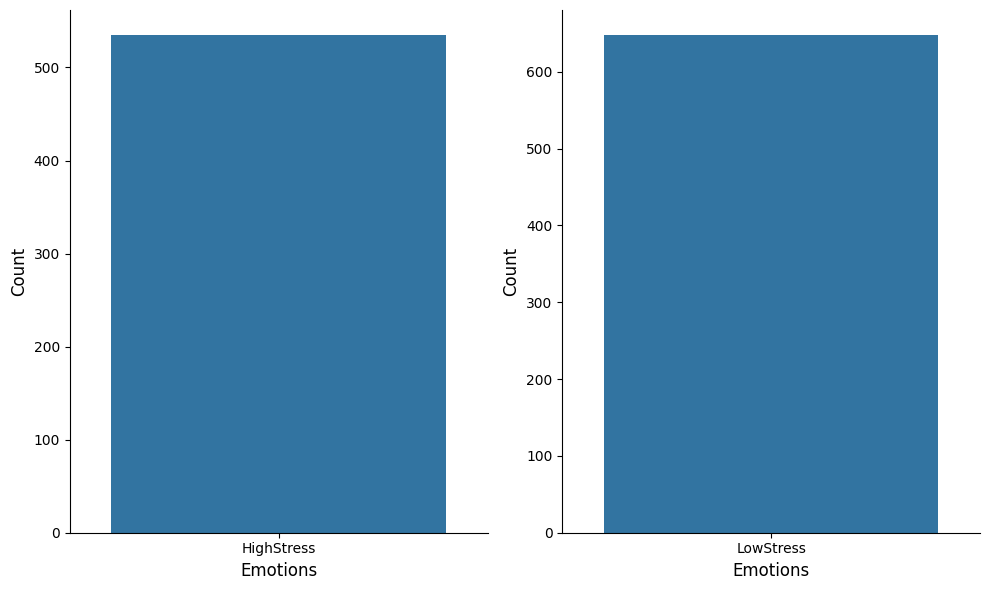

In [ ]:
#plt.figure(1)
#plt.title('Count of Emotions', size=16)

#sns.countplot(data=dfhigh, x='Emotions')
#sns.countplot(data=dflow, x='Emotions')
#plt.ylabel('Count', size=12)
#plt.xlabel('Emotions', size=12)
#sns.despine(top=True, right=True, left=False, bottom=False)
#plt.show()

dflow_path = '/content/drive/My Drive/kuliah suckssss./smt 7 skripshotttt/BERSAMA SAMA/data_pathlow2denoise.csv'
dfhigh_path = '/content/drive/My Drive/kuliah suckssss./smt 7 skripshotttt/BERSAMA SAMA/data_pathhigh2denoise.csv'

# Load data from CSV files
dflow = pd.read_csv(dflow_path)
dfhigh = pd.read_csv(dfhigh_path)

# Plotting
plt.figure(1, figsize=(10, 6))  # Adjust the figsize as needed
plt.title('Count of Emotions', size=16)

plt.subplot(1, 2, 1)  # Subplot for dfhigh
sns.countplot(data=dfhigh, x='Emotions')
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)

plt.subplot(1, 2, 2)  # Subplot for dflow
sns.countplot(data=dflow, x='Emotions')
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)

sns.despine(top=True, right=True, left=False, bottom=False)
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

## ekstraksi mfcc

In [ ]:
from tqdm import tqdm_notebook

In [ ]:
audio_length=8000 * 1

dim = (40, 1 + int(np.floor(audio_length/512)), 1)
def prepare_data(fnames):
    X = np.empty(shape=(len(fnames), dim[0], dim[1], 1))
    input_length = audio_length
    for i, fname in tqdm_notebook(enumerate(fnames), total=len(fnames)):
        data, _ = librosa.core.load(fname, sr=8000, res_type="kaiser_fast")
        # Random offset / Padding
        if len(data) > input_length:
            max_offset = len(data) - input_length
            offset = np.random.randint(max_offset)
            data = data[offset:(input_length+offset)]
        else:
            if input_length > len(data):
                max_offset = input_length - len(data)
                offset = np.random.randint(max_offset)
            else:
                offset = 0
            data = np.pad(data, (offset, input_length - len(data) - offset), "constant")

        # data = np.pad(data, (1, 1), "constant")
        data = librosa.feature.mfcc(y=data, sr=8000, n_mfcc=40)
        data = np.expand_dims(data, axis=-1)
        X[i,] = data
        # X=data
    return X

### merge semua

In [ ]:
# print(np.array(dflow['Path']))

merged_df = pd.concat([dflow, dfhigh], ignore_index=True)
merged_df.to_csv('merged_data2denoise.csv', index=False)
# x_train = np.array(merged_df['Path'])
# data = prepare_data(x_train)

In [ ]:
X = merged_df['Path'].values
Y = merged_df['Emotions'].values

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)

encoder = LabelEncoder()
encoder.fit(y_train)
y_train = encoder.transform(y_train)

encoder.fit(y_test)
y_test = encoder.transform(y_test)

# prepare data
X_test = prepare_data(x_test)
Y_test = to_categorical(y_test, num_classes=2)

X_train = prepare_data(x_train)
Y_train = to_categorical(y_train, num_classes=2)

mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

# THIS IS THE READY VARIABLE FOR TRAINED
x_train_with_mfcc = X_train
x_test_with_mfcc = X_test
y_train_with_mfcc = Y_train
y_test_with_mfcc = Y_test

print(X_train.shape, Y_train.shape)

  0%|          | 0/296 [00:00<?, ?it/s]

  0%|          | 0/887 [00:00<?, ?it/s]

(887, 40, 16, 1) (887, 2)


### model 2d cnn

In [ ]:
from keras import Sequential
from keras.utils import Sequence, to_categorical
from sklearn.preprocessing import LabelEncoder
from keras import losses, models, optimizers
from keras.activations import relu, softmax
from keras.layers import Dense, Dropout, Input, Convolution2D, BatchNormalization, Activation, MaxPool2D, MaxPooling2D, Flatten, Conv2D
from sklearn.metrics import confusion_matrix

def get_2d_conv_model(input_dimension):

    nclass = 2

    #change the dim from 1 to 2
    inp = Input(shape=(dim[0],dim[1], input_dimension))
    x = Convolution2D(32, kernel_size=5, padding="same")(inp)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D(padding="same",)(x)


    x = Convolution2D(32*2, kernel_size=5, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D(padding="same",)(x)

    x = Convolution2D(32*3, kernel_size=5, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D(padding="same",)(x)


    x = Convolution2D(32*3, kernel_size=5, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D(padding="same",)(x)


    x = Flatten()(x)
    x = Dense(64)(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    out = Dense(nclass, activation=softmax)(x)

    model = models.Model(inputs=inp, outputs=out)
    opt = optimizers.Adam(0.0001)

    model.compile(optimizer=opt, loss=losses.categorical_crossentropy, metrics=['acc'])
    return model

In [ ]:
model_mfcc = get_2d_conv_model(1)
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0001)

history = model_mfcc.fit(x_train_with_mfcc, y_train_with_mfcc,
                    validation_data=(x_test_with_mfcc, y_test_with_mfcc),
                    batch_size=32,
                    callbacks=[rlrp],
                    epochs=40)

Epoch 1/40
28/28 [==============================] - 7s 133ms/step - loss: 0.5116 - acc: 0.7745 - val_loss: 0.6472 - val_acc: 0.6047 - lr: 1.0000e-04
Epoch 2/40
28/28 [==============================] - 3s 124ms/step - loss: 0.2408 - acc: 0.9290 - val_loss: 0.6908 - val_acc: 0.5101 - lr: 1.0000e-04
Epoch 3/40
28/28 [==============================] - 4s 153ms/step - loss: 0.1562 - acc: 0.9763 - val_loss: 0.7380 - val_acc: 0.5101 - lr: 1.0000e-04
Epoch 4/40
28/28 [==============================] - 6s 205ms/step - loss: 0.1050 - acc: 0.9921 - val_loss: 0.7959 - val_acc: 0.5135 - lr: 1.0000e-04
Epoch 5/40
28/28 [==============================] - 3s 116ms/step - loss: 0.0755 - acc: 0.9955 - val_loss: 0.8440 - val_acc: 0.5270 - lr: 1.0000e-04
Epoch 6/40
28/28 [==============================] - 3s 115ms/step - loss: 0.0597 - acc: 0.9977 - val_loss: 0.8716 - val_acc: 0.5338 - lr: 1.0000e-04
Epoch 7/40
28/28 [==============================] - 3s 120ms/step - loss: 0.0461 - acc: 0.9989 - val_loss:

In [ ]:
model_mfcc.save('/content/drive/My Drive/kuliah suckssss./smt 7 skripshotttt/BERSAMA SAMA/modeldelfinoise.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## cek akurasi

In [ ]:
def check_accuracy(X_test, Y_test, model):
  print("Accuracy of our model on test data : " , model.evaluate(X_test,Y_test)[1]*100 , "%")

  epochs = [i for i in range(40)]
  fig , ax = plt.subplots(1,2)
  train_acc = history.history['acc']
  train_loss = history.history['loss']
  test_acc = history.history['val_acc']
  test_loss = history.history['val_loss']

  fig.set_size_inches(20,6)
  ax[0].plot(epochs , train_loss , label = 'Training Loss')
  ax[0].plot(epochs , test_loss , label = 'Testing Loss')
  ax[0].set_title('Training & Testing Loss')
  ax[0].legend()
  ax[0].set_xlabel("Epochs")

  ax[1].plot(epochs , train_acc , label = 'Training acc')
  ax[1].plot(epochs , test_acc , label = 'Testing acc')
  ax[1].set_title('Training & Testing acc')
  ax[1].legend()
  ax[1].set_xlabel("Epochs")
  plt.show()

10/10 [==============================] - 0s 47ms/step - loss: 0.0889 - acc: 0.9561
Accuracy of our model on test data :  95.60810923576355 %


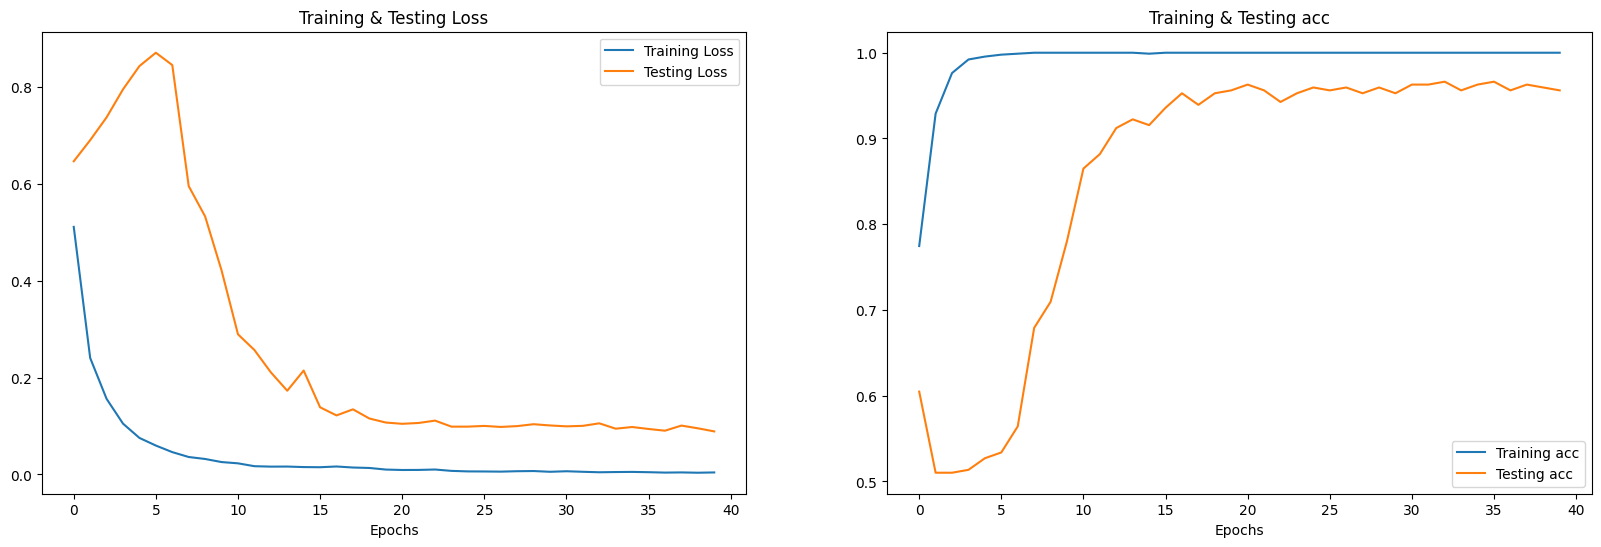

In [ ]:
check_accuracy(x_test_with_mfcc, y_test_with_mfcc, model_mfcc)

## predict

In [ ]:
import wave

predict_data_path = "/content/drive/MyDrive/kuliah suckssss./smt 7 skripshotttt/BERSAMA SAMA/AudioWAVhigh2denoise/zero3m4.wav"
predict_low_data_path = "/content/drive/MyDrive/kuliah suckssss./smt 7 skripshotttt/BERSAMA SAMA/AudioWAVlow2denoise/zero3.wav"

random_data_path = "/content/drive/MyDrive/kuliah suckssss./smt 7 skripshotttt/BERSAMA SAMA/LowStress-m4-wide4.wav"

y, sr = librosa.load(random_data_path, sr=24000)

# Resample to 8000 Hz
y_resampled = librosa.resample(y, orig_sr=sr, target_sr=8000)
output_path = "/content/drive/MyDrive/kuliah suckssss./smt 7 skripshotttt/BERSAMA SAMA/file_sample2.wav"
sf.write(output_path, y_resampled, 8000)

wav = wave.open(output_path)
print("Sampling (frame) rate = ", wav.getframerate())
print("Total samples (frames) = ", wav.getnframes())
print("Duration = ", wav.getnframes()/wav.getframerate())

predict_data = prepare_data([output_path])
predict_data = model_mfcc.predict(predict_data, use_multiprocessing=True, workers=6, verbose=1)
predicted_labels = encoder.inverse_transform([np.argmax(predict_data)])

print(predict_data)
print(predicted_labels)
# encoder.fit(y_train)
# y_train = encoder.transform(y_train)

Sampling (frame) rate =  8000
Total samples (frames) =  5824
Duration =  0.728


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 35ms/step
[[1. 0.]]
['HighStress']
